In [68]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from arch import arch_model

n = 200
params_1 = [0.01,0.12,0.09]
params_2 = [0.01,0.03,-0.03] 

np.random.seed(2)
w = np.random.normal(size=n)
eps = np.zeros_like(w)
sigsq = np.zeros_like(w)

In [69]:
def generateGARCHPoints():
    
    r = np.zeros_like(w)
    
    for t in range(1, n):
        sigsq[t] = params_1[0] + params_1[1]*(eps[t-1]**2) + params_1[2]*sigsq[t-1]
        eps[t] = w[t] * np.sqrt(sigsq[t])
    
    for t in range(2,n):
        r[t] = params_2[0] + params_2[1] * r[t-1] + params_2[2] * r[t-2] + eps[t]
    
    return r

In [70]:
def drawPlot(points):
    x = range(1,len(points)+1) 
    plt.plot(x, points,color = 'b',linewidth=1,alpha=0.6,label='observation')
    plt.legend(loc='upper right')
    plt.show()

In [71]:
def drawACF(points):
    plot_acf(points,lags = 30,markersize = 3 )
    plt.title('ACF')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()

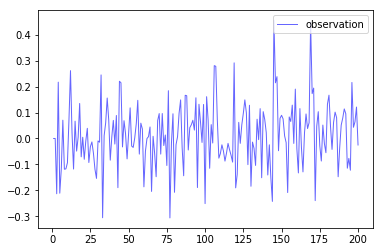

In [72]:
#Q1
points = generateGARCHPoints()
drawPlot(points)

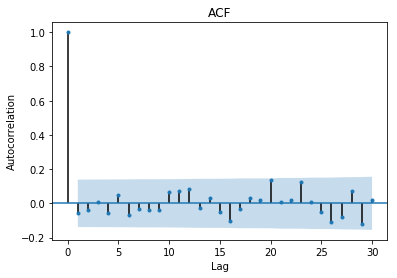

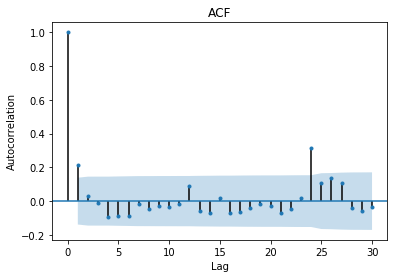

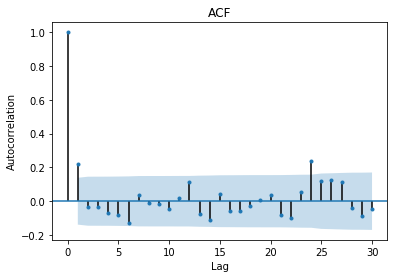

In [73]:
#Q2 ACF 
drawACF(points)

r2 = list(map(lambda k : k**2,points))
drawACF(r2)

rAbs = list(map(lambda k:abs(k),points))
drawACF(rAbs)

In [74]:
#Q3 fit the mean function
result = sm.tsa.arma_order_select_ic(points, ic='aic', trend='nc')
orders = result.aic_min_order

mdl = smt.ARMA(points, order=orders).fit(maxlag=20, method='mle', trend='nc')
print(orders)
print(mdl.params)

(0, 1)
[-0.04921679]


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [75]:
#Q4
model = arch_model(points, mean='ARX', vol='GARCH', p=1, q=1).fit()
model

Iteration:      1,   Func. Count:      6,   Neg. LLF: -136.23026827223697
Iteration:      2,   Func. Count:     16,   Neg. LLF: -136.323528416674
Iteration:      3,   Func. Count:     25,   Neg. LLF: -136.35333766321548
Iteration:      4,   Func. Count:     32,   Neg. LLF: -136.85045464257885
Iteration:      5,   Func. Count:     39,   Neg. LLF: -136.9348689070632
Iteration:      6,   Func. Count:     45,   Neg. LLF: -138.25315999872026
Iteration:      7,   Func. Count:     51,   Neg. LLF: -138.27071866888684
Iteration:      8,   Func. Count:     57,   Neg. LLF: -138.27209596927833
Iteration:      9,   Func. Count:     63,   Neg. LLF: -138.27228099664472
Iteration:     10,   Func. Count:     69,   Neg. LLF: -138.27228366599508
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -138.27228456951892
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10


                           AR - GARCH Model Results                           
Dep. Variable:                      y   R-squared:                      -0.002
Mean Model:                        AR   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:                138.272
Distribution:                  Normal   AIC:                          -268.545
Method:            Maximum Likelihood   BIC:                          -255.351
                                        No. Observations:                  200
Date:                Thu, Mar 28 2019   Df Residuals:                      196
Time:                        14:46:44   Df Model:                            4
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      7.3081e-03  8.672e-03      0.843      0.399 

In [76]:
#Q5
forecastResult = model.forecast(horizon = 10)
forecastResult.variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
w_new = np.random.normal(size=10)
r_new = np.zeros_like(w_new)
sigsq_new = np.zeros_like(w_new)
eps_new = np.zeros_like(w_new)

a0 = 0.01
a1 = 0.273
a2 = 0.01

sigsq_new[0] = a0 + a1*(eps[199]**2) + a2*sigsq[199]
eps_new[0] = w_new[0] * np.sqrt(sigsq_new[0])

for t in range(1,0):
    sigsq_new[t] = a0 + a1*(eps_new[t-1]**2) + params_1[2]*sigsq_new[t-1]
    eps_new[t] = w_new[t] * np.sqrt(sigsq_new[t])
    

for t in range(2,10):
    r_new[t] = params_2[0] + params_2[1] * r_new[t-1] + params_2[2] * r_new[t-2] + eps_new[t]

print(r_new)

[0.         0.         0.01       0.0103     0.010009   0.00999127
 0.00999947 0.01000025 0.01000002 0.00999999]
